In [15]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
plt.rcParams["figure.figsize"] = (20,10)

In [16]:

t = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(t, t)

In [17]:
class Function:
    def __init__(self, params, function_eval=None, function_grad=None):
        self.gen_f = []
        self.gen_g = []
        self.params = params
        self.fun_iter = 0
        self.grad_iter = 0
        if function_eval is None and function_grad is None:
            self.generate_square_function(params)
            self.gen = True
        else:
            self.gen = False
            self.function_eval = function_eval
            self.function_grad = function_grad

    def function(self, *var_list):
        assert len(var_list) == self.params
        self.fun_iter += 1
        return self.function_eval(*var_list) if not self.gen else self.gen_func(*var_list)

    def gen_func(self, *var_list):
        assert len(var_list) == self.params
        sum = 0
        for i in range(self.params):
            sum += self.gen_f[i](var_list[i])
        return sum

    def grad(self, *var_list):
        assert len(var_list) == self.params
        self.grad_iter += 1
        return self.function_grad(var_list) if not self.gen else self.gen_grad(*var_list)

    def gen_grad(self, *var_list):
        assert len(var_list) == self.params
        gr = []
        for i in range(self.params):
            gr.append(self.gen_g[i](var_list[i]))
        return gr

    def generate_square_function(self, params):
        for i in range(params):
            cur1 = randint(1, 10)
            cur2 = randint(-100, 100)
            cur3 = randint(-100, 100)
            self.gen_f.append(lambda x : cur1 * x ** 2 + cur2 * x + cur3)
            self.gen_g.append(lambda x : cur1 * x + cur2)

    def get_fun_iter(self):
        return self.fun_iter

    def get_grad_iter(self):
        return self.grad_iter

In [18]:
# 1 задание: Градиентный спуск с постоянным шагом

def f(x, y):
    return 37 + 9 * x + 12 * x ** 2 - 12 * y + 8 * y ** 2

def grad(x, y):
    return [24 * x + 9, 4 * (4 * y - 3)]


lr = 0.06
epoch = 20
x = [randint(-100, 100), randint(-100, 100)]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    points[i] = x

print(points[-1])

[-0.37498863  0.75      ]
[-0.37500796  0.75      ]


In [19]:
# 2 задание: Ступенчатый градиентный спуск

epoch = 20
limit = epoch / 3
x = [randint(-10, 10), randint(-100, 10)]

points = np.zeros((epoch, 2))
points[0] = x

for i in range(1, epoch):
    lr = 0.3 / min(i, limit)
    x = x - lr * np.array(grad(x[0], x[1]))
    points[i] = x

print(points[-1])

[-0.375       0.74999999]
[-0.375       0.74999997]


In [20]:
# 3 задание: дихотомия
def t(x):
    return 5 * x ** 2 + 6 * x + 2
def grad_t(x):
    return 10 * x + 6

f3 = Function(1, t, grad_t)

a, b = -10., 10.
eps = 0.5
delta = eps / 3

k = 0
while abs(a - b) >= eps:
    k += 1
    mid = (a + b) / 2
    x1, x2 = mid - delta, mid + delta
    f1, f2 = f3.function(x1), f3.function(x2)
    if f1 == f2:
        a = x1
        b = x2
    elif f1 < f2:
        b = x2
    else:
        a = x1
print("--------------")
print("iterations:", k)
print((a + b) / 2)
print(f3.get_fun_iter(), f3.get_grad_iter())

--------------
iterations: 7
-0.5377604166666667
14 0
--------------
iterations: 7
-0.5377604166666667
14 0


In [21]:
# 3 задание: golden search

from math import sqrt

a, b = -10., 10.
golden_const = (3 - sqrt(5)) / 2
eps = 0.5
delta = eps / 3

k = 0

f3 = Function(1, t, grad_t)
x1, x2 = a + (b - a) * golden_const, b - (b - a) * golden_const
f1, f2 = f3.function(x1), f3.function(x2)
while True:
    k += 1
    if f1 >= f2:
        a = x1
        if b - a <= eps:
            break
        x1 = x2
        f1 = f2
        x2 = b - (b - a) * golden_const
        f2 = f3.function(x2)
    else:
        b = x2
        if b - a <= eps:
            break
        x2 = x1
        f2 = f1
        x1 = a + (b - a) * golden_const
        f1 = f3.function(x1)
print("iterations:", k)
print((a + b) / 2)
print(f3.get_fun_iter(), f3.get_grad_iter())

iterations: 8
-0.6075308874148273
9 0
iterations: 8
-0.6075308874148273
9 0


126 56


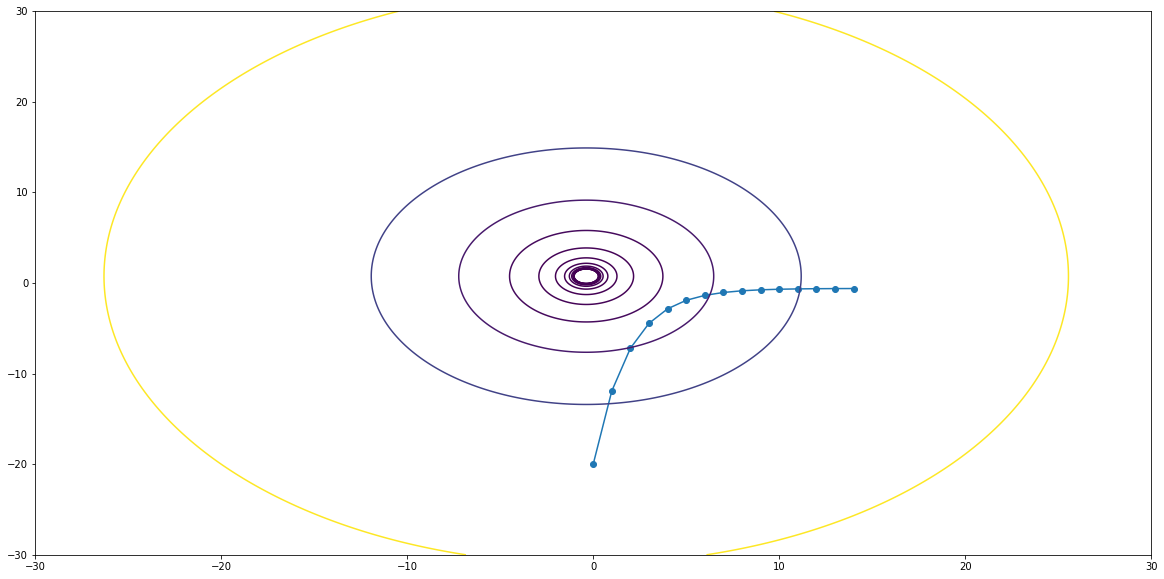

126 56


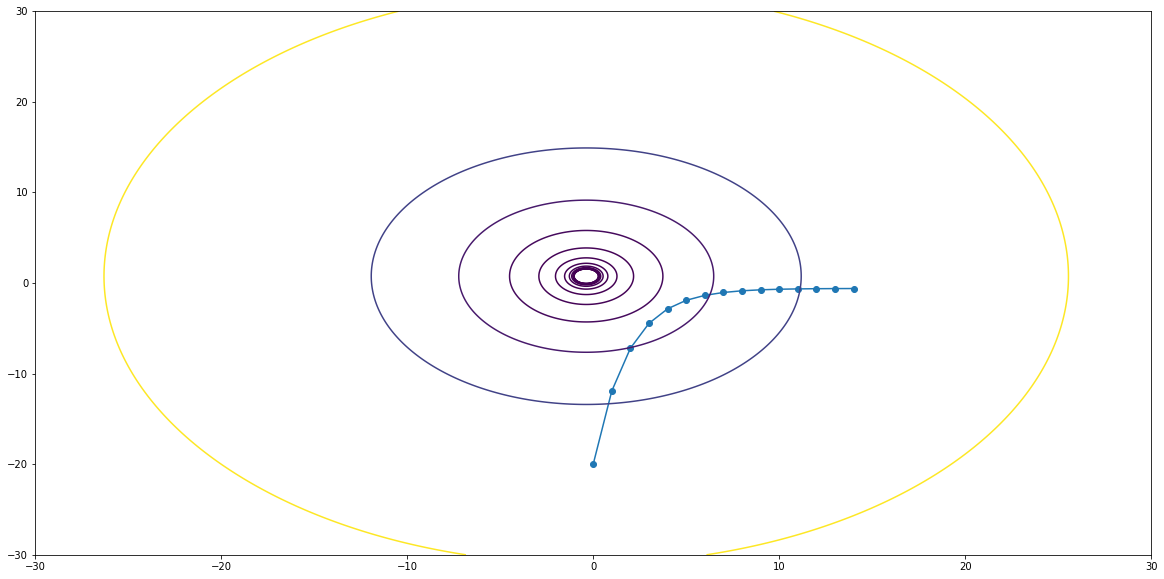

In [22]:
# 3 задание: дихотомия и градиент (1-dim)
def t(x):
    return 5 * x ** 2 + 6 * x + 2
def grad_t(x):
    return 10 * x[0] + 6

f3 = Function(1, t, grad_t)

eps = 0.1
delta = eps / 3

def dichotomy(a, b):
    while abs(a - b) >= eps:
        mid = (a + b) / 2
        x1, x2 = mid - delta, mid + delta
        f1, f2 = f3.function(x1), f3.function(x2)
        if f1 < f2:
            b = x2
        else:
            a = x1
    return (a + b) / 2

def phi(x, a):
    return f3.function(*(x - a * np.array(f3.grad(*x))))

def find_next(x):
    right_border = 0.1
    first = phi(x, right_border)
    if phi(x, 0) > first:
        right_border *= 2
        while first >= phi(x, right_border):
            right_border *= 2
    return dichotomy(0, right_border)

epoch = 15
x = [-20]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - find_next(x) * np.array(f3.grad(*x))
    points[i][0] = x
print(f3.get_fun_iter(), f3.get_grad_iter())

plt.plot(points[:, 0], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

[[-1.         -1.        ]
 [-0.125       0.63333333]
 [-0.375       0.71111111]
 [-0.375       0.74740741]
 [-0.375       0.74982716]
 [-0.375       0.74998848]
 [-0.375       0.74999923]]


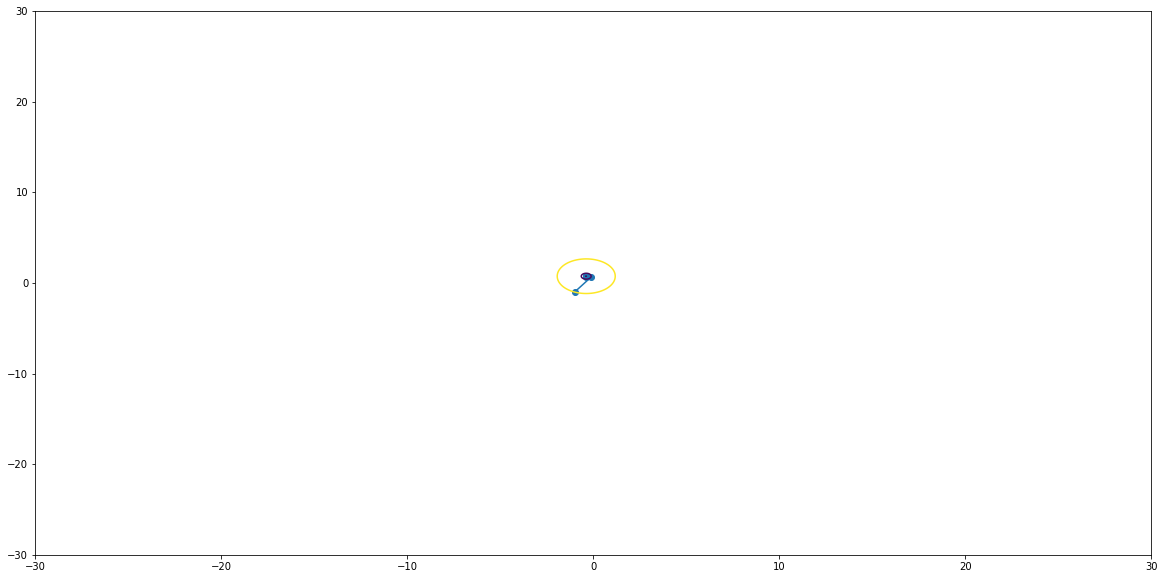

[[-1.         -1.        ]
 [-0.125       0.63333333]
 [-0.375       0.71111111]
 [-0.375       0.74740741]
 [-0.375       0.74982716]
 [-0.375       0.74998848]
 [-0.375       0.74999923]]


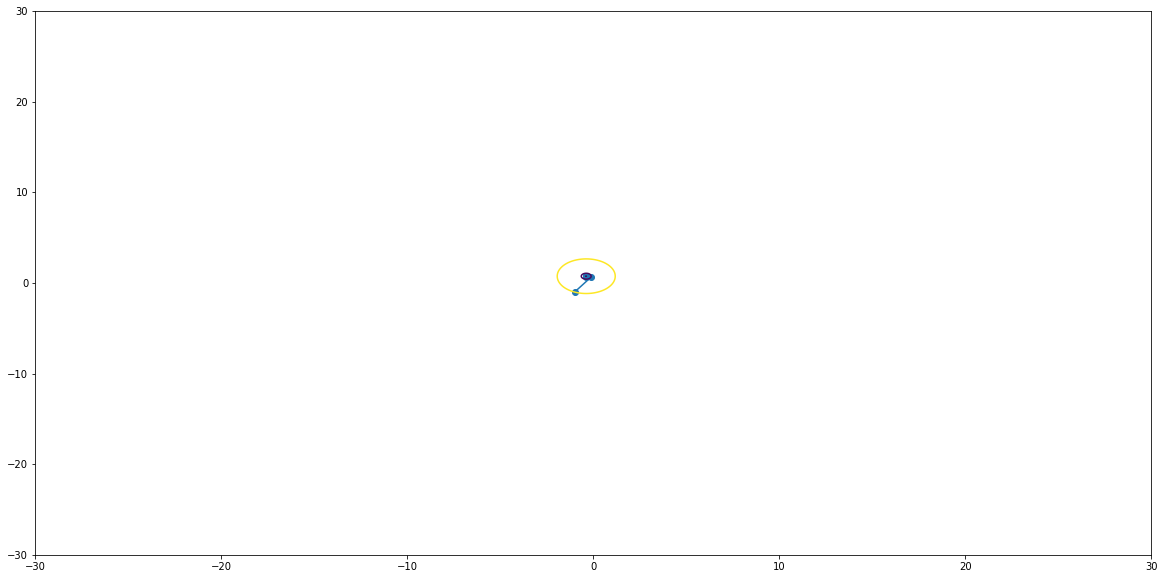

In [23]:
# 3 задание: дихотомия и градиент 2-dim

def f(t):
    return 37 + 9 * t[0] + 12 * t[0] ** 2 - 12 * t[1] + 8 * t[1] ** 2

def f2(x, y):
    return 37 + 9 * x + 12 * x ** 2 - 12 * y + 8 * y ** 2

def grad(t):
    return [24 * t[0] + 9, 4 * (4 * t[1] - 3)]

def grad2(x, y):
    return 37 + 9 * x + 12 * x ** 2 - 12 * y + 8 * y ** 2

eps = 0.1
delta = eps / 3

def dichotomy(x, a, b):
    while abs(a - b) >= eps:
        mid = (a + b) / 2
        x1, x2 = mid - delta, mid + delta
        f1, f2 = phi(x, x1), phi(x, x2)
        if f1 < f2:
            b = x2
        else:
            a = x1
    return (a + b) / 2

def phi(x, a):
    return f(x - a * np.array(grad(x)))

def find_next(x):
    right_border = 0.1
    first = phi(x, right_border)
    if phi(x, 0) > first:
        right_border *= 2
        while first >= phi(x, right_border):
            right_border *= 2
    return dichotomy(x, 0, right_border)

epoch = 7
x = [-1, -1]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - find_next(x) * np.array(grad(x))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f2(X, Y), levels=sorted([f2(p[0], p[1]) for p in points]))

[[-20.         -20.        ]
 [  9.4375       0.75      ]
 [ -5.28125      0.75      ]
 [  2.078125     0.75      ]
 [ -1.6015625    0.75      ]
 [  0.23828125   0.75      ]
 [ -0.68164062   0.75      ]
 [ -0.22167969   0.75      ]
 [ -0.45166016   0.75      ]
 [ -0.33666992   0.75      ]
 [ -0.39416504   0.75      ]
 [ -0.36541748   0.75      ]
 [ -0.37979126   0.75      ]
 [ -0.37260437   0.75      ]
 [ -0.37619781   0.75      ]]


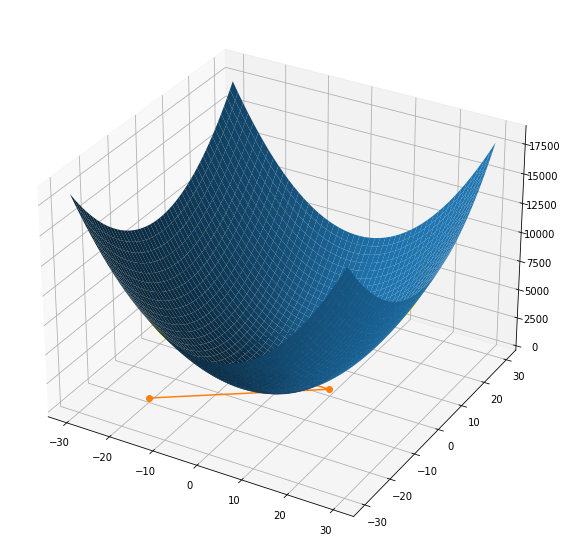

[[-20.         -20.        ]
 [  9.4375       0.75      ]
 [ -5.28125      0.75      ]
 [  2.078125     0.75      ]
 [ -1.6015625    0.75      ]
 [  0.23828125   0.75      ]
 [ -0.68164062   0.75      ]
 [ -0.22167969   0.75      ]
 [ -0.45166016   0.75      ]
 [ -0.33666992   0.75      ]
 [ -0.39416504   0.75      ]
 [ -0.36541748   0.75      ]
 [ -0.37979126   0.75      ]
 [ -0.37260437   0.75      ]
 [ -0.37619781   0.75      ]]


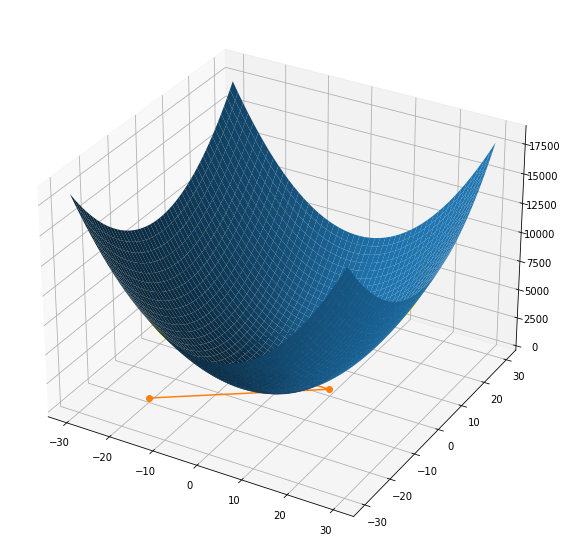

In [24]:
# 4 задание: условия Вольфе

def f(t):
    return 37 + 9 * t[0] + 12 * t[0] ** 2 - 12 * t[1] + 8 * t[1] ** 2

def f2(x, y):
    return 37 + 9 * x + 12 * x ** 2 - 12 * y + 8 * y ** 2

def grad(t):
    return [24 * t[0] + 9, 4 * (4 * t[1] - 3)]

t = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f2(X, Y))

def phi(x, a):
    return f(x - a * np.array(grad(x)))

c1 = 0.0001
c2 = 0.9

def multiply_vectors(v1, v2):
    return v1[0] * v2[0] + v1[1] * v2[1]

def wolfe1_condition(x, a):
    return phi(x, a) <= f(x) - c1 * a * multiply_vectors(np.array(grad(x)), np.array(grad(x)))

def wolfe2_condition(x, a):
    return -multiply_vectors(grad(x - a * np.array(grad(x))), np.array(grad(x))) \
           >= -c2 * multiply_vectors(np.array(grad(x)), np.array(grad(x)))

inf = 100

def find_next(x):
    a, l, r = 1, 0, inf
    while True:
        if not wolfe1_condition(x, a):
            r = a
            a = (l + r) / 2
        elif not wolfe2_condition(x, a):
            l = a
            if r == inf:
                a *= 2
            else:
                a = (l + r) / 2
        else:
            return a

epoch = 15
x = [-20, -20]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - find_next(x) * np.array(grad(x))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f2(X, Y), levels=sorted([f2(p[0], p[1]) for p in points]))

[[-100.         -100.        ]
 [  49.4375        0.75      ]
 [ -25.28125       0.75      ]
 [  12.078125      0.75      ]
 [  -6.6015625     0.75      ]
 [   2.73828125    0.75      ]
 [  -1.93164062    0.75      ]
 [   0.40332031    0.75      ]
 [  -0.76416016    0.75      ]
 [  -0.18041992    0.75      ]
 [  -0.47229004    0.75      ]
 [  -0.32635498    0.75      ]
 [  -0.39932251    0.75      ]
 [  -0.36283875    0.75      ]
 [  -0.38108063    0.75      ]]
30.812943688360974


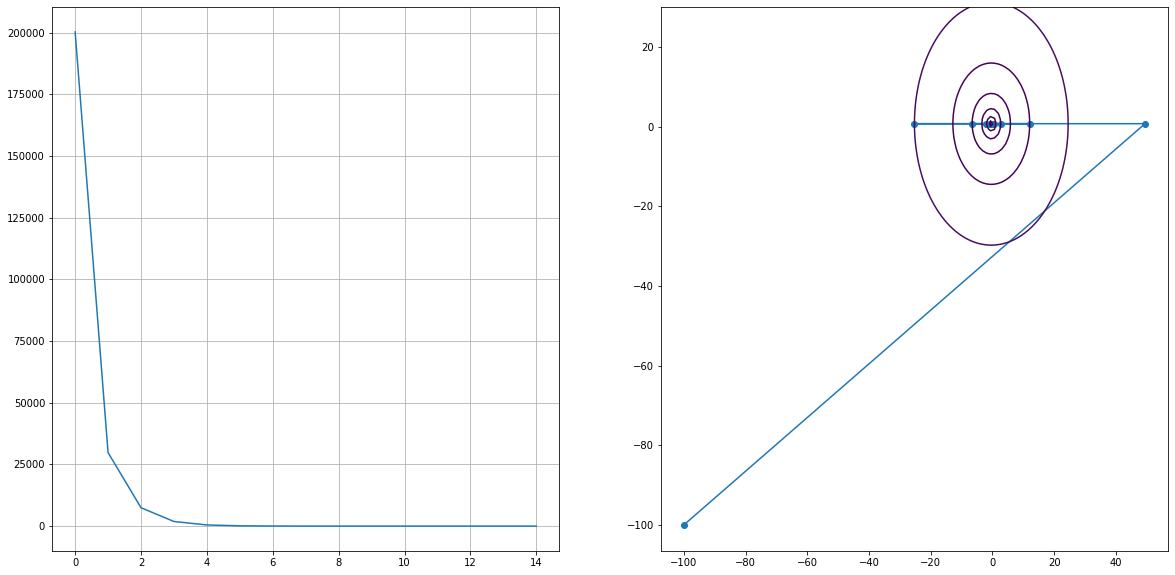

[[-100.         -100.        ]
 [  49.4375        0.75      ]
 [ -25.28125       0.75      ]
 [  12.078125      0.75      ]
 [  -6.6015625     0.75      ]
 [   2.73828125    0.75      ]
 [  -1.93164062    0.75      ]
 [   0.40332031    0.75      ]
 [  -0.76416016    0.75      ]
 [  -0.18041992    0.75      ]
 [  -0.47229004    0.75      ]
 [  -0.32635498    0.75      ]
 [  -0.39932251    0.75      ]
 [  -0.36283875    0.75      ]
 [  -0.38108063    0.75      ]]
30.812943688360974


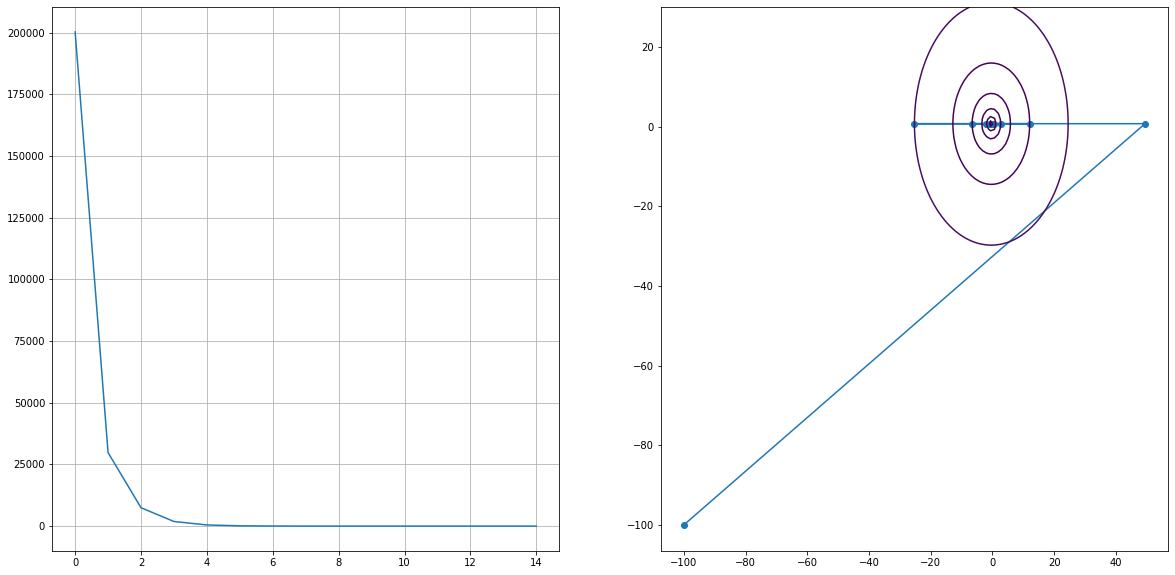

In [25]:
# 5 задание: сравнение функций

# возьмем функцию из 3-го задания и сравним поведение в способах выбора шага

def f(t):
    return 37 + 9 * t[0] + 12 * t[0] ** 2 - 12 * t[1] + 8 * t[1] ** 2

def f2(x, y):
    return 37 + 9 * x + 12 * x ** 2 - 12 * y + 8 * y ** 2

def grad(t):
    return [24 * t[0] + 9, 4 * (4 * t[1] - 3)]

def phi(x, a):
    return f(x - a * np.array(grad(x)))

c1 = 0.0001
c2 = 0.9

def multiply_vectors(v1, v2):
    return v1[0] * v2[0] + v1[1] * v2[1]

def wolfe1_condition(x, a):
    return phi(x, a) <= f(x) - c1 * a * multiply_vectors(np.array(grad(x)), np.array(grad(x)))

def wolfe2_condition(x, a):
    return -multiply_vectors(grad(x - a * np.array(grad(x))), np.array(grad(x))) \
           >= -c2 * multiply_vectors(np.array(grad(x)), np.array(grad(x)))

inf = 100

def find_next(x):
    a, l, r = 1, 0, inf
    while True:
        if not wolfe1_condition(x, a):
            r = a
            a = (l + r) / 2
        elif not wolfe2_condition(x, a):
            l = a
            if r == inf:
                a *= 2
            else:
                a = (l + r) / 2
        else:
            return a

epoch = 15
x = [-100, -100]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - find_next(x) * np.array(grad(x))
    points[i] = x

print(points)
t = np.linspace(-30, 30)
X, Y = np.meshgrid(t, t)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(f2(points[:, 0], points[:, 1]))
ax1.grid()
ax2.plot(points[:, 0], points[:, 1], 'o-')
ax2.contour(X, Y, f2(X, Y), levels=sorted([f2(p[0], p[1]) for p in points] + list(np.linspace(-1, 1, 100))))
print(f2(points[-1, 0], points[-1, 1]))

[[-20.         -20.        ]
 [  6.25       -11.        ]
 [ -9.6875     -11.328125  ]
 [ -1.61621094  -6.63476562]
 [ -7.11853027  -5.050354  ]
 [ -2.6064682    1.16131592]
 [ -9.05967712   2.08067274]
 [ -6.12037167   4.90173775]
 [-10.82284275   8.00153561]
 [ -7.0890585   10.63348202]
 [ -9.77843388  11.76962754]
 [ -7.79914946  15.43874183]
 [-10.9250321   16.19613331]
 [ -8.27251913  19.47524504]
 [-11.94975451  19.87600164]]
-455.416393888718


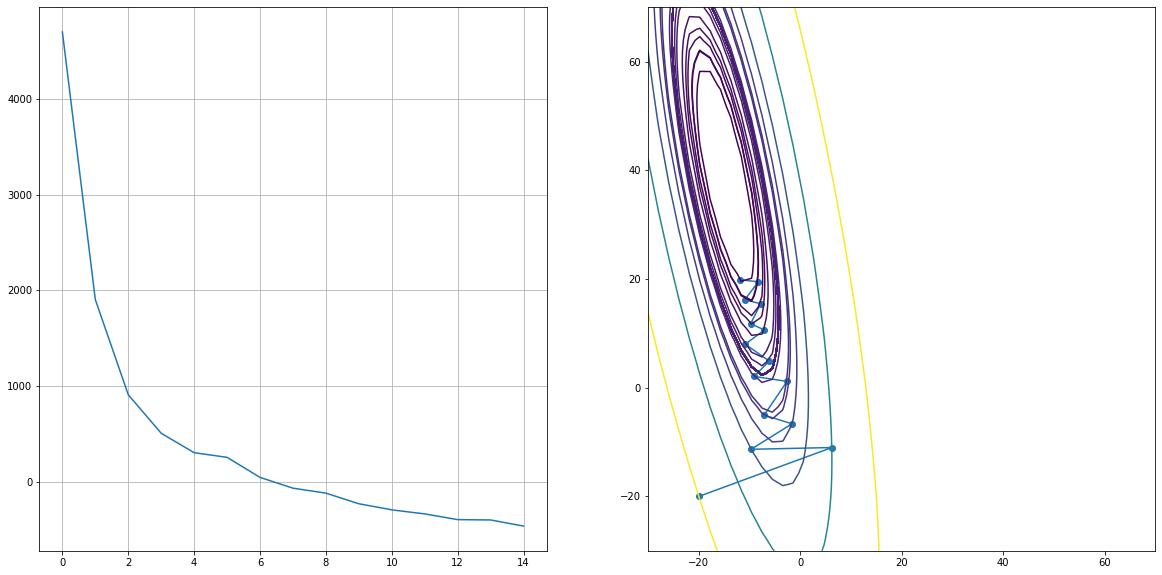

[[-20.         -20.        ]
 [  6.25       -11.        ]
 [ -9.6875     -11.328125  ]
 [ -1.61621094  -6.63476562]
 [ -7.11853027  -5.050354  ]
 [ -2.6064682    1.16131592]
 [ -9.05967712   2.08067274]
 [ -6.12037167   4.90173775]
 [-10.82284275   8.00153561]
 [ -7.0890585   10.63348202]
 [ -9.77843388  11.76962754]
 [ -7.79914946  15.43874183]
 [-10.9250321   16.19613331]
 [ -8.27251913  19.47524504]
 [-11.94975451  19.87600164]]
-455.416393888718


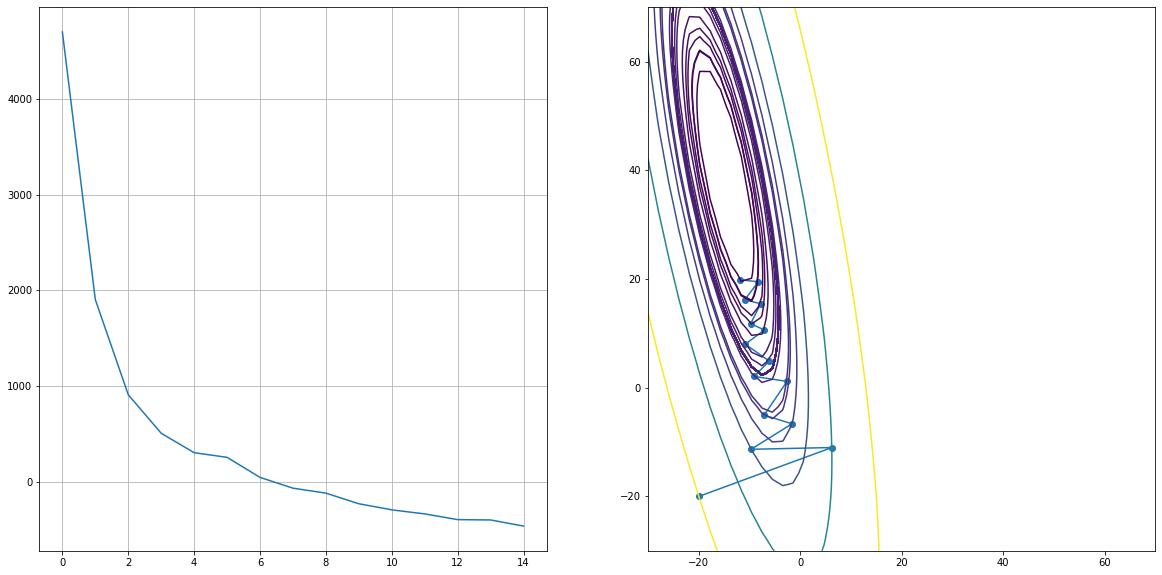

In [26]:
# 5 задание: другая функция (условия Вольфе)

def f(t):
    return 23 - 8 * t[0] + 12 * (t[0] + 7) ** 2 + 5 * t[0] * t[1] + (t[1] - 2) ** 2

def f2(x, y):
    return 23 - 8 * x + 12 * (x + 7) ** 2 + 5 * y * x + (y - 2) ** 2

def grad(t):
    return [-8 + 24 * (t[0] + 7) + 5 * t[1], 5 * t[0] + 2 * (t[1] - 2)]


def phi(x, a):
    return f(x - a * np.array(grad(x)))

c1 = 0.0001
c2 = 0.9

def multiply_vectors(v1, v2):
    return v1[0] * v2[0] + v1[1] * v2[1]

def wolfe1_condition(x, a):
    return phi(x, a) <= f(x) - c1 * a * multiply_vectors(np.array(grad(x)), np.array(grad(x)))

def wolfe2_condition(x, a):
    return -multiply_vectors(grad(x - a * np.array(grad(x))), np.array(grad(x))) \
           >= -c2 * multiply_vectors(np.array(grad(x)), np.array(grad(x)))

inf = 100

def find_next(x):
    a, l, r = 1, 0, inf
    while True:
        if not wolfe1_condition(x, a):
            r = a
            a = (l + r) / 2
        elif not wolfe2_condition(x, a):
            l = a
            if r == inf:
                a *= 2
            else:
                a = (l + r) / 2
        else:
            return a

epoch = 15
x = [-20, -20]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - find_next(x) * np.array(grad(x))
    points[i] = x

print(points)
t = np.linspace(-30, 70)
X, Y = np.meshgrid(t, t)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(f2(points[:, 0], points[:, 1]))
ax1.grid()
ax2.plot(points[:, 0], points[:, 1], 'o-')
ax2.contour(X, Y, f2(X, Y), levels=sorted([f2(p[0], p[1]) for p in points] + list(np.linspace(-1, 1, 100))))
print(f2(points[-1, 0], points[-1, 1]))

[[-20.         -20.        ]
 [ -2.5        -14.        ]
 [ -9.4375      -3.709375  ]
 [ -5.89388021  -1.26744792]
 [-15.8078498   27.96729106]
 [-12.49318564  29.09665218]
 [-13.79900943  31.00969644]
 [-13.12702009  31.46701537]
 [-14.9836873   36.90814438]
 [-14.35586341  37.12073387]
 [-14.60167001  37.47636152]
 [-14.47424198  37.56201265]
 [-14.82197663  38.57470058]
 [-14.70306262  38.61472066]
 [-14.74516708  38.67487285]]
-645.4783174841293


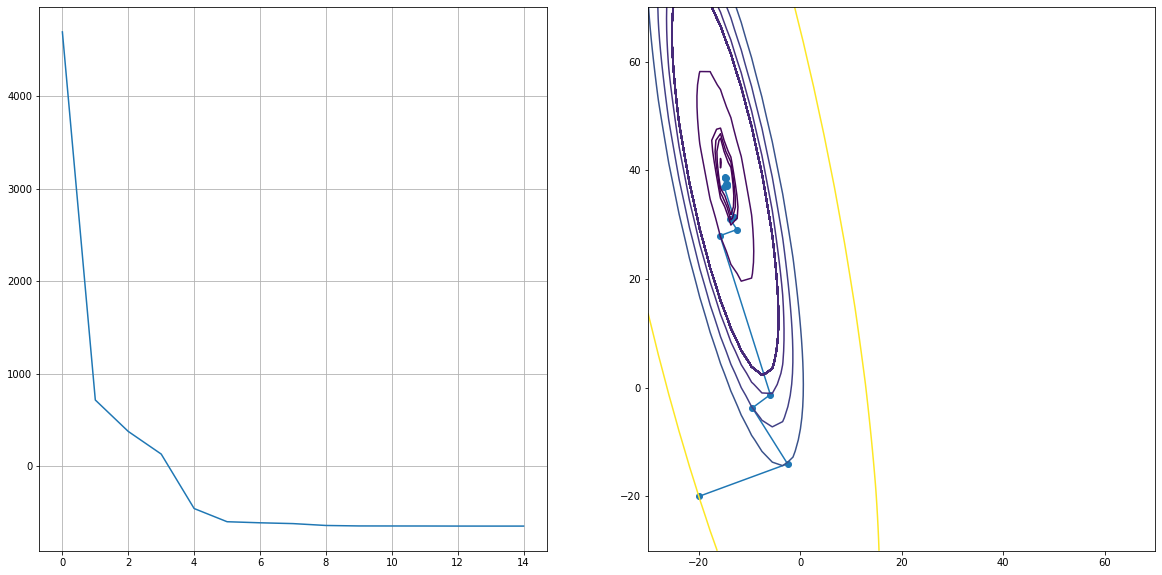

[[-20.         -20.        ]
 [ -2.5        -14.        ]
 [ -9.4375      -3.709375  ]
 [ -5.89388021  -1.26744792]
 [-15.8078498   27.96729106]
 [-12.49318564  29.09665218]
 [-13.79900943  31.00969644]
 [-13.12702009  31.46701537]
 [-14.9836873   36.90814438]
 [-14.35586341  37.12073387]
 [-14.60167001  37.47636152]
 [-14.47424198  37.56201265]
 [-14.82197663  38.57470058]
 [-14.70306262  38.61472066]
 [-14.74516708  38.67487285]]
-645.4783174841293


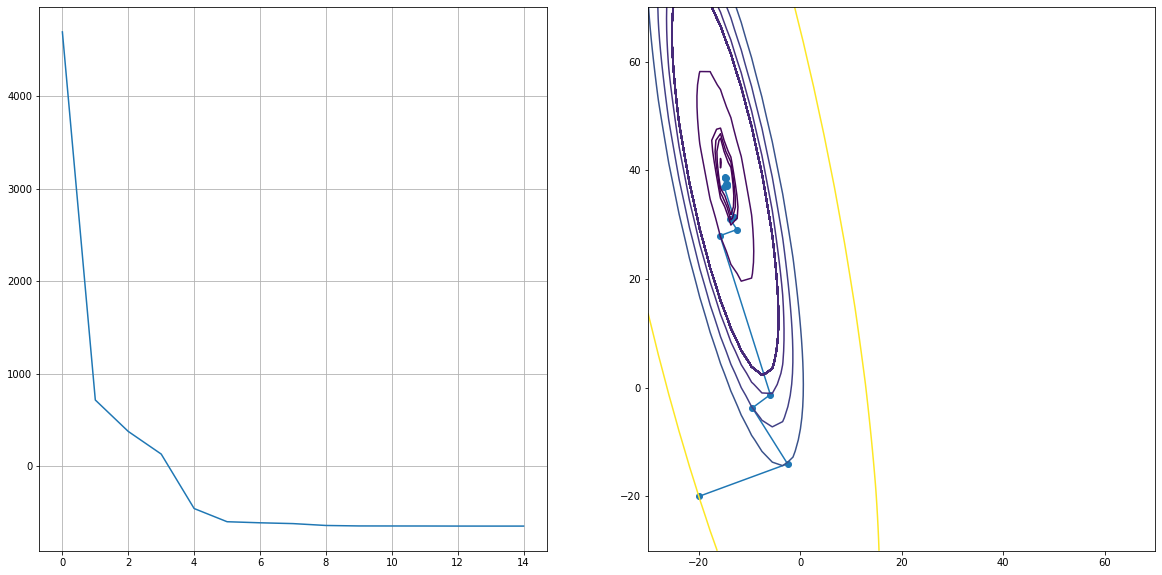

In [27]:
# 5 задание: другая функция (дихотомия)

def f(t):
    return 23 - 8 * t[0] + 12 * (t[0] + 7) ** 2 + 5 * t[0] * t[1] + (t[1] - 2) ** 2

def f2(x, y):
    return 23 - 8 * x + 12 * (x + 7) ** 2 + 5 * y * x + (y - 2) ** 2

def grad(t):
    return [-8 + 24 * (t[0] + 7) + 5 * t[1], 5 * t[0] + 2 * (t[1] - 2)]

eps = 0.1
delta = eps / 3

def dichotomy(x, a, b):
    while abs(a - b) >= eps:
        mid = (a + b) / 2
        x1, x2 = mid - delta, mid + delta
        f1, f2 = phi(x, x1), phi(x, x2)
        if f1 < f2:
            b = x2
        else:
            a = x1
    return (a + b) / 2

def phi(x, a):
    return f(x - a * np.array(grad(x)))

def find_next(x):
    right_border = 0.1
    first = phi(x, right_border)
    if phi(x, 0) > first:
        right_border *= 2
        while first >= phi(x, right_border):
            right_border *= 2
    return dichotomy(x, 0, right_border)

epoch = 15
x = [-20, -20]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - find_next(x) * np.array(grad(x))
    points[i] = x

print(points)
t = np.linspace(-30, 70)
X, Y = np.meshgrid(t, t)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(f2(points[:, 0], points[:, 1]))
ax1.grid()
ax2.plot(points[:, 0], points[:, 1], 'o-')
ax2.contour(X, Y, f2(X, Y), levels=sorted([f2(p[0], p[1]) for p in points] + list(np.linspace(-1, 1, 100))))
print(f2(points[-1, 0], points[-1, 1]))

In [28]:
# Задание 6. Рандомные функции

def phi(x, a, func):
    return func.function(*(x - a * np.array(func.grad(*x))))

def dichotomy(a, b, x, func):
    while abs(a - b) >= 0.1:
        mid = (a + b) / 2
        x1, x2 = mid - delta, mid + delta
        f1, f2 = phi(x, x1, func), phi(x, x2, func)
        if f1 < f2:
            b = x2
        else:
            a = x1
    return (a + b) / 2

def find_next(x, func):
    right_border = 0.1
    first = phi(x, right_border, func)
    if phi(x, 0, func) > first:
        right_border *= 2
        while first >= phi(x, right_border, func):
            right_border *= 2
    return dichotomy(0, right_border, x, func)

eps = 0.001

def compare(a, b):
    for i in range(len(a)):
        if abs(a[i] - b[i]) >= eps:
            return True
    return False

epoch = 50
delta = eps / 3
for j in range(1, 101):
    func = Function(j)
    x = [0] * j
    points = np.zeros((epoch, j))
    points[0] = x
    cur = [1] * j
    k = 0
    while compare(cur, x):
        k += 1
        cur = x
        x = x - find_next(x, func) * np.array(func.grad(*x))
    print(k)


69
66
23
27
66
257
64
93
29
233
28
28
32
46
126
33
67
42
25
30
21
13
43
88
33
66
22
86
45
138
130
23
35
65
51
119
43
84
33
67
20
253
24
136
27
41
41
23
44
46
91
33
147
58
106
225
62
25
36
93
207
22
16
24
35
39
28
42
64
69
215
41
37
51
90
253
39
32
140
29
108
24
139
76
31
138
30
44
31
24
41
32
38
24
51
20
26
46
41
52
85
14
17
103
234
44
26
77
84
42
44
49
117
44
68
116
25
36
44
80
84
29
22
23
48
91
41
49
62
223
67
30
21
45
33
90
37
26
34
24
52
20
28
29
32
24
27
277
46
113
279
42
91
23
40
119
54
88
52
90
51
59
38
53
48
40
67
23
130
266
53
31
48
33
139
138
43
34
28
284
238
45
29
30
138
38
22
53
130
260
60
51
135
43
65
38
25
33
28
23
